#### Load the Dataset

In [1]:
import pandas as pd

df = pd.read_csv("/content/SocialMedia.csv")
docs = df['Text'].dropna().astype(str).tolist()

# show first 10 row
for i, doc in enumerate(docs[:10]):
    print(f"{i+1}: {doc}")

1:  Enjoying a beautiful day at the park!              
2:  Traffic was terrible this morning.                 
3:  Just finished an amazing workout! 💪               
4:  Excited about the upcoming weekend getaway!        
5:  Trying out a new recipe for dinner tonight.        
6:  Feeling grateful for the little things in life.    
7:  Rainy days call for cozy blankets and hot cocoa.   
8:  The new movie release is a must-watch!             
9:  Political discussions heating up on the timeline.  
10:  Missing summer vibes and beach days.               


#### Install libraries

In [ ]:
%pip install nltk spacy gensim torchtext fasttext scikit-learn

## Bag of Word (BoW)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import joblib

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(docs)

joblib.dump(X_bow, 'bow_features.pkl')
joblib.dump(vectorizer, 'bow_vectorizer.pkl')

['bow_vectorizer.pkl']

## TF-IDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(docs)

joblib.dump(X_tfidf, 'tfidf_features.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## Word2Vec

#### Embedding with `gensim`

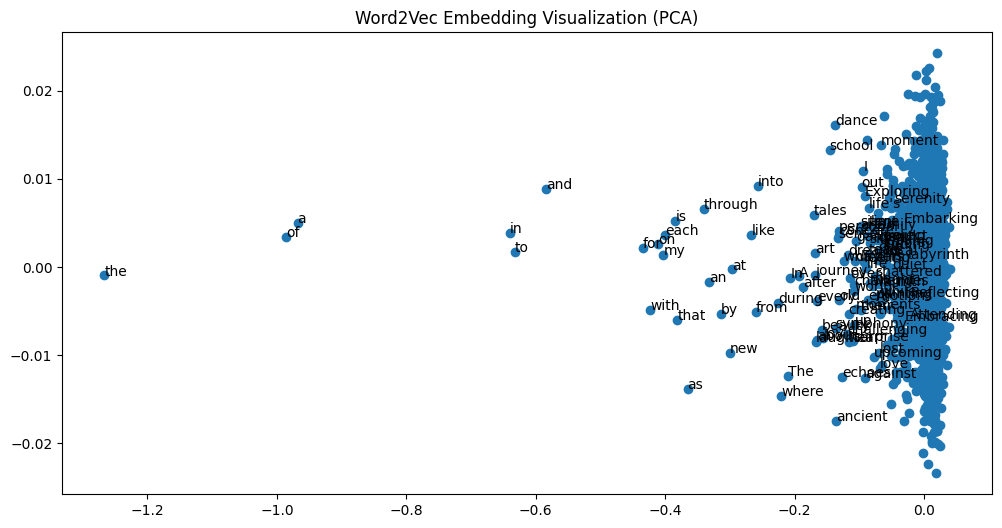

In [15]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

corpus = [doc.split() for doc in docs]
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

# Gensim visualization
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(12, 6))
plt.scatter(result[:, 0], result[:, 1])

# Annotate only the first 100 words for clarity
for i, word in enumerate(words[:100]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word2Vec Embedding Visualization (PCA)")
plt.show()

#### Embedding with `fasttext`

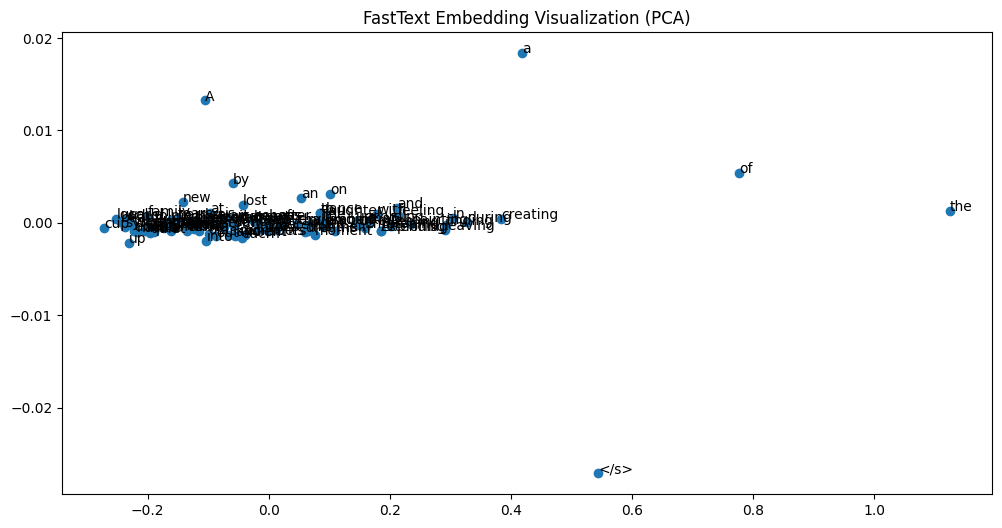

In [19]:
import fasttext
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Save the corpus to a .txt file for fasttext usage
with open("corpus.txt", "w", encoding='utf-8') as f:
    for doc in docs:
        f.write(doc.strip() + "\n")

# Train fasttext model and save
model = fasttext.train_unsupervised('corpus.txt', model='skipgram')
model.save_model("fasttext_model.bin")

def embed_with_fasttext(doc):
    words = doc.split()
    vectors = [model.get_word_vector(word) for word in words]
    if not vectors:
        return np.zeros(model.get_dimension())
    return np.mean(vectors, axis=0)

fasttext_embeddings = np.array([embed_with_fasttext(doc) for doc in docs])
np.save("fasttext_embeddings.npy", fasttext_embeddings)

# visualize FastText words, Limit to 100 words
words_to_visualize = model.get_words()[:100]
word_vectors = [model.get_word_vector(w) for w in words_to_visualize]

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(12, 6))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("FastText Embedding Visualization (PCA)")
plt.show()

#### Embedding with `spaCy`

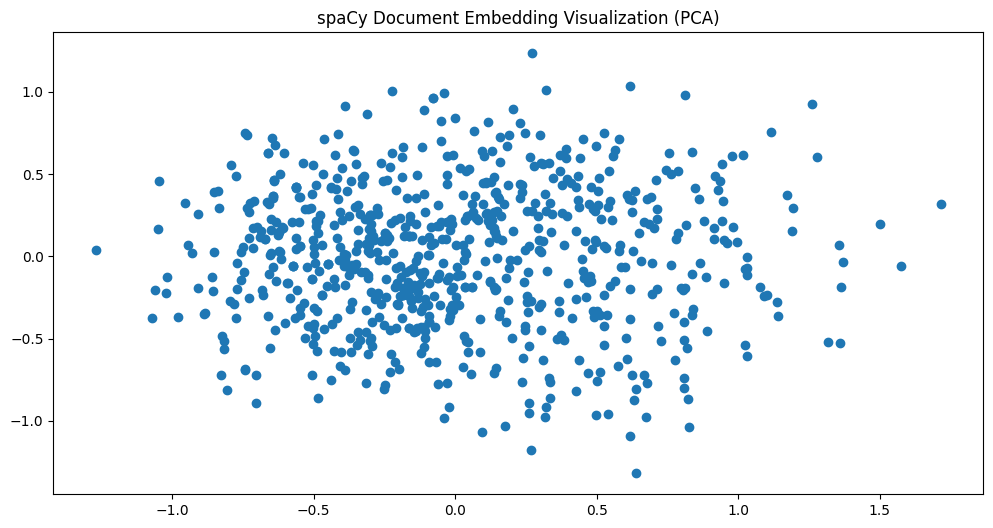

In [18]:
import spacy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

!python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")

spacy_embeddings = np.array([nlp(doc).vector for doc in docs])
np.save("spacy_embeddings.npy", spacy_embeddings)


# Visualize spaCy document embeddings
pca = PCA(n_components=2)
result = pca.fit_transform(spacy_embeddings)

plt.figure(figsize=(12, 6))
plt.scatter(result[:, 0], result[:, 1])

plt.title("spaCy Document Embedding Visualization (PCA)")
plt.show()

### About Output of Embeding Methods:

- **gensim Word2Vec**: Train-from-scratch, word-level, no sub-word.

- **FastText**: Train-from-scratch, word-level (with OOV handling), uses sub-word.
- **spaCy**: Pre-trained, token/sentence/document level, integrated into NLP pipeline.
